# Introduction to Data Science Project, March 2020

Subject : Bitcoin Price

## Your Data
First Name: Idan
<br>
Last Name: Bardugo
<br>
E-mail: idanbar93@gmail.com
<br>

## Installation And Requirements
pip install pandas-datareader
<br>
pip install --upgrade tensorflow
<br>
pip install keras
<br>
pip install newsapi-python
<br>
pip install -U textblob

## Introduction

Bitcoin is a decentralized digital currency without a central bank or single administrator
<br>That can be sent from user to user on the peer-to-peer network without the need for intermediaries.

During my project, I will try to find out if bitcoin is purely about supply and demand.

I will build a long short term memory neural network, that will be trained on historical bitcoin prices data.
What differntiate long short term memory neural network from other conventional RNN models,
is its ability to remember short-term memory over a long period of time.
It fits my project, since the data that i am working with is a time-series and the current price is dependent on the previous prices.

I will try to find out the following:
- correlation between transactions volume and the bitcoin price
<br>
- correlation between generated bitcoins to the bitcoin price.
<br>
- I will try to find out if news are affecting bitcoin price using a sentiment analysis.
<br>

## Data Gathering

I have tried to fetch data using Postman, from a RESTful API that belongs to the most official cryptocurrency data website - https://coinmarketcap.com/.
<br>
I had a basic subscription, So i got a response that says my api subscription does not support getting historical data of the bitcoin prices from the API.
<br>
I have also tried to fetch data from https://CryptoDatum.io, but they lack the features that i wanted to use in order to find correlations.
<br>
I aimed for a rich dataset with a lot of attributes that i could check on the correlations between the different attributes.

I have tried to merge a dataset with another dataset that has more instances and less features, I have tried to concat/merge between the 2 datasets, But i ran into these problems: differnt sizes of dataframes, different data types of features, One dataframe that has more features than the other. After the datasets merged i have encountered a lot of NA values.

I have built a python script that will manage to pull the data belongs to bitcoin prices with the features i wanted
from www.blockchain.com, But after i have pulled the data i got a lot of NA values and some of the values was not presented in the rows, Could have been due to the fact that the different charts has used different time intervals so it was a problem to get them all at one dataframe.

Eventually i used pandas datareader to get the data from Yahoo.
<br>
Later on, I have used richer dataset with more features in order to check correlation between different features. 

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn import preprocessing 
import matplotlib.pyplot as plt
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from newsapi import NewsApiClient
from textblob import TextBlob
from dateutil import parser

Using TensorFlow backend.


## Getting The Data

In [2]:
df = web.DataReader('BTC-USD', data_source='yahoo', start='2014-09-17', end='2020-10-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100,398.821014
...,...,...,...,...,...,...
2020-10-28,13837.695312,12932.250977,13654.214844,13271.285156,35867318894,13271.285156
2020-10-29,13612.047852,12980.059570,13271.298828,13437.882812,56499499598,13437.882812
2020-10-30,13651.516602,13136.198242,13437.874023,13546.522461,30581485200,13546.522461


## Visualize The Data

E:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


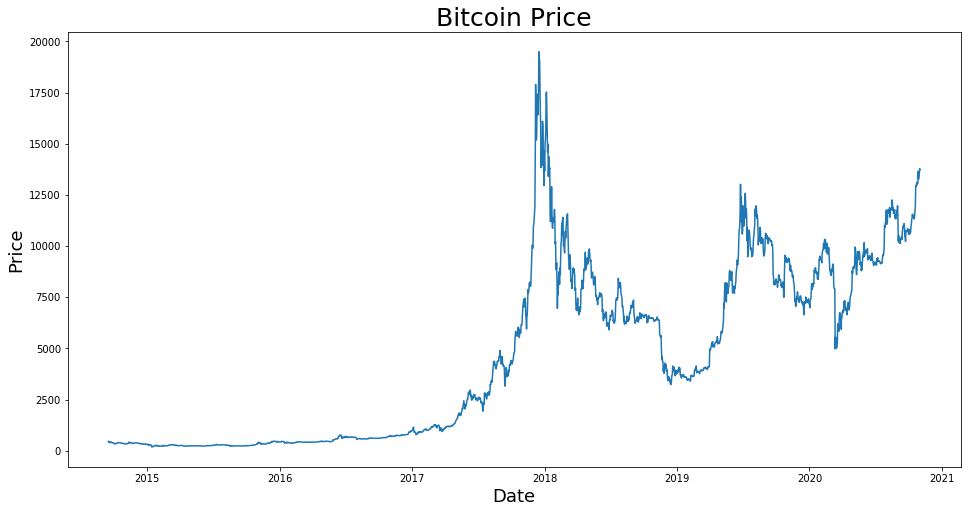

In [3]:
plt.figure(figsize=(16,8))
plt.title("Bitcoin Price", fontsize=25)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

## The Halving Event

The "Halving Event" happens once every 4 years approximatly. The event causes the number of generated coins to be cut in half, The coins become more rare, and demand slowly overcome supply. We started to see big price movements after the second 'Halving event', Which occured in the 10th of july 2016. The latest 'Halving Event' occured in May 11, 2020.

In order for my model to be trained on a data that correspond to bitcoin price volatility nowadays,I picked a section that is more volatile, I will get rid of some of the early days data.I want that the model will pick the pattern that every day there could be jumping in the price up or down for tens or hunderds precents.

In [4]:
df = df[700:]
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-08-16,580.893982,571.429993,577.760986,573.216003,54443000,573.216003
2016-08-17,577.791992,573.429993,573.706970,574.317993,59896600,574.317993
2016-08-18,578.237976,574.182007,574.338989,575.630005,50631600,575.630005
2016-08-19,582.817993,575.456970,576.083984,581.697021,45301400,581.697021
2016-08-20,584.158020,580.218018,581.939026,581.307983,38299400,581.307983
...,...,...,...,...,...,...
2020-10-28,13837.695312,12932.250977,13654.214844,13271.285156,35867318894,13271.285156
2020-10-29,13612.047852,12980.059570,13271.298828,13437.882812,56499499598,13437.882812
2020-10-30,13651.516602,13136.198242,13437.874023,13546.522461,30581485200,13546.522461


## Visualize The Contracted Data

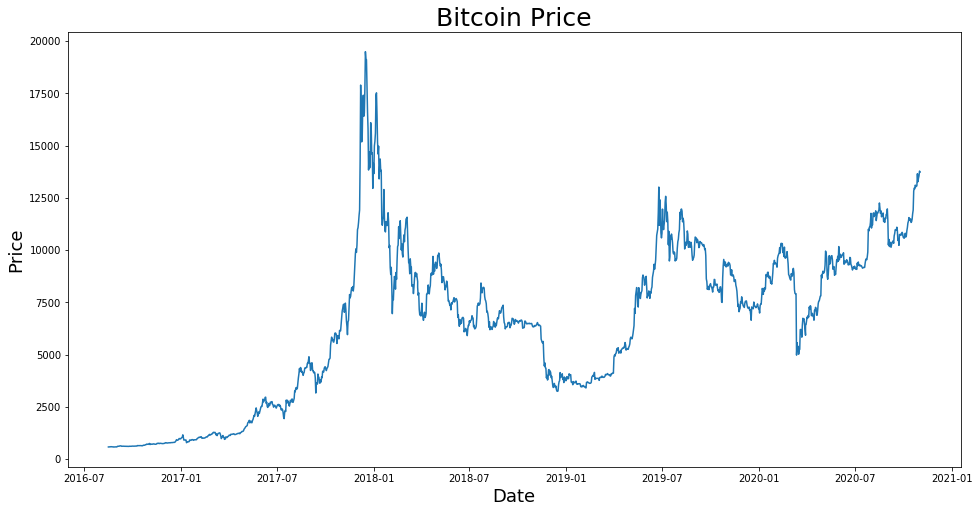

In [5]:
plt.figure(figsize=(16,8))
plt.title("Bitcoin Price", fontsize=25)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [6]:
btc_close_price = df['Close'].values.astype('float32')
btc_close_price = btc_close_price.reshape(len(btc_close_price), 1)

# PART 1 - Bitcoin Price Prediction

# Pre-Processing

## Split The Data Into Train And Test

When spliting the data we will usually use train_test_split that belongs to sklearn, But this method shuffles and split the samples.
<br>
In my case my data is a time-series data so it shouldn't be shuffled, because the order of the samples is important.
<br>
I will manually split the data to 80% train set and a 20% test set.

In [7]:
train_size = int(len(btc_close_price) * 0.8)
test_size = len(btc_close_price) - train_size

## Scaling The Data
The price of bitcoin ranges from a hundred dollars to tens of thousands of dollars,
Therfore it is important to put the data on a scale.
<br>
We will Fit our scaler model with the training set only, because we wouldn't want prediction information to be leaked from training to test.
<br>
Then we will Transform our data to be based on values between 0 to 1 inclusive.


In [8]:
currency_close_price_scaled = []

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(btc_close_price[:train_size])
currency_close_price_scaled[:train_size] = scaler.transform(btc_close_price[:train_size])
currency_close_price_scaled[train_size:] = scaler.transform(btc_close_price[train_size:])

# The test part dependent on the previous data - the training part

train = currency_close_price_scaled[:train_size]
test = currency_close_price_scaled[train_size:]

## We Will Devide The Data Into Sequences

LSTM uses sequences of data as well as the current sample to make predictions

In [9]:
# The function takes our data and create small sequences of it

def create_sequences(dataset, sequence_length):
    sequence_length += 1
    seq_dataset = []
    for i in range(len(dataset) - sequence_length):
        seq_dataset.append(dataset[i: i + sequence_length])

    # Converting list to numpy array so we can reshape it
    seq_dataset = np.array(seq_dataset)
    
    # Split the sequence dataset to 2 dataset
    data_x = seq_dataset[:, :-1]
    data_y = seq_dataset[:, -1]
        
    return data_x, data_y

In [10]:
# look_back - the number of days we want to look back to.
look_back = 10

x_train, y_train = create_sequences(train, look_back)
x_test, y_test = create_sequences(test, look_back)

## Build The LSTM Model

We will use Sequential model - feed-forward model
<br>
Input Layer --> Hidden Layer --> Output Layer

We will make more than one hidden layers, Because we don't want a linear relationship.

We will use Dropout to avoid overfitting, In order to increase the model ability to genralize.
<br>
Dropout is a technique that randomly switch neurons on and off.
<br>
It forces the data to create new pathways between weights in each layer, The weights become more rubust to more heterogeneous data,
<br>
Which means you can give it new data that is different than the training set and it will be better able to generalize.

A neural network does not aim for accuracy, rather trying to minimize loss.
<br>
We will compile our model using a loss function and an optimizer.
<br>
The loss function will be 'mean squared error', and the optimizer will be 'adam'.

In [11]:
model = Sequential()

# the number of units (dimension of the output state) used for the LSTM cell - 50
# return_sequences:  True return the last output in the output sequence, or False the full sequence.

model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
model.add(Dropout(0.35))

model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.35))

# add the output layer — a simple Dense with default linear activation function and dimension 1.
model.add(Dense(output_dim=1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer='rmsprop')

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  del sys.path[0]


## Train The Model

In [12]:
#    batch_size -- the group size
#    Epochs - the number of epochs determines how many iterations we need to make on the dataset.
#    validation_split - representing the proportion of training data to be used as validation data

history = model.fit(x_train, y_train, batch_size=64, epochs=25, verbose=2, validation_split=0.08)

Train on 1121 samples, validate on 98 samples
Epoch 1/25
 - 1s - loss: 0.0134 - val_loss: 0.0014
Epoch 2/25
 - 0s - loss: 0.0039 - val_loss: 0.0126
Epoch 3/25
 - 0s - loss: 0.0043 - val_loss: 0.0033
Epoch 4/25
 - 0s - loss: 0.0039 - val_loss: 8.9204e-04
Epoch 5/25
 - 0s - loss: 0.0039 - val_loss: 0.0016
Epoch 6/25
 - 0s - loss: 0.0035 - val_loss: 8.1310e-04
Epoch 7/25
 - 0s - loss: 0.0034 - val_loss: 0.0045
Epoch 8/25
 - 0s - loss: 0.0038 - val_loss: 0.0026
Epoch 9/25
 - 0s - loss: 0.0034 - val_loss: 0.0095
Epoch 10/25
 - 0s - loss: 0.0035 - val_loss: 7.7876e-04
Epoch 11/25
 - 0s - loss: 0.0030 - val_loss: 0.0014
Epoch 12/25
 - 0s - loss: 0.0028 - val_loss: 0.0023
Epoch 13/25
 - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 14/25
 - 0s - loss: 0.0030 - val_loss: 0.0038
Epoch 15/25
 - 0s - loss: 0.0030 - val_loss: 0.0021
Epoch 16/25
 - 0s - loss: 0.0026 - val_loss: 0.0036
Epoch 17/25
 - 0s - loss: 0.0028 - val_loss: 0.0013
Epoch 18/25
 - 0s - loss: 0.0022 - val_loss: 0.0021
Epoch 19/25
 - 

## Evaluating Our Model
### Calculating How Well Our Data Is Fit

Error = Prediction-Real_Price
<br>
(Error_1 ** 0.5) + (Error_2 ** 0.5) + (Error_3 ** 0.5) + ... + (Error_N ** 0.5)
<br>
We will devide the sum of the squared errors in the number of datapoints and we will get the Mean_Sqaured_Error 

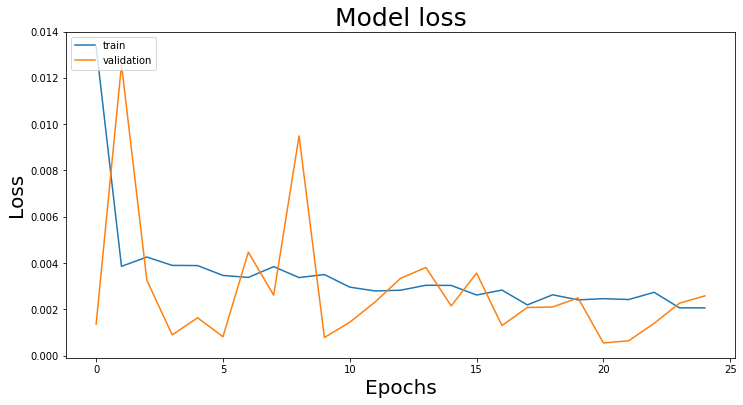

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=25)
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Predicting Price Values

In [14]:
train_predict = model.predict(x_train)

# Get the models predicted price values
test_predict = model.predict(x_test)

# We want our prediction datasets to contain the unnormalized values as in our dataset,
# so we inverse transform the data, with the relevant dataset for each.

train_predict_unnorm = scaler.inverse_transform(train_predict)
test_predict_unnorm = scaler.inverse_transform(test_predict)

## Ploting The Predicted Data

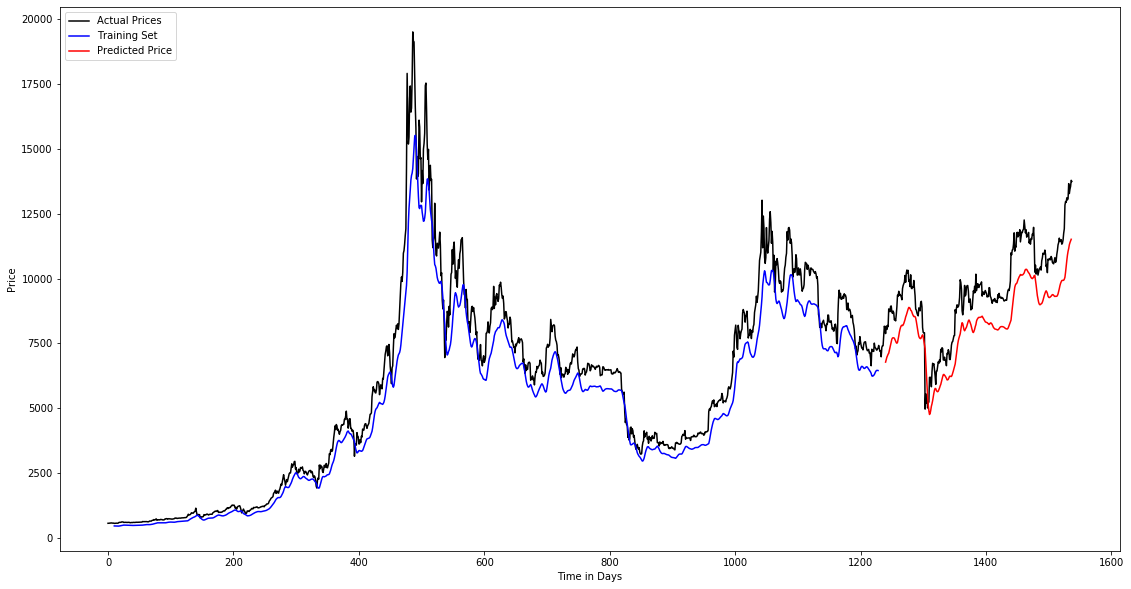

In [15]:
trainPredict = np.empty_like(btc_close_price)
trainPredict[:, :] = np.nan
trainPredict[look_back:len(train_predict_unnorm)+look_back, :] = train_predict_unnorm

testPredict = np.empty_like(btc_close_price)
testPredict[:, :] = np.nan
testPredict[len(train_predict_unnorm)+(look_back*2)+1:len(btc_close_price)-1, :] = test_predict_unnorm

plt.figure(figsize=(19, 10))
plt.plot(btc_close_price, 'black', label = 'Actual Prices')
plt.plot(trainPredict, 'blue', label = 'Training Set')
plt.plot(testPredict, 'red', label = 'Predicted Price')
plt.legend(loc = 'upper left')
plt.xlabel('Time in Days')
plt.ylabel('Price')

plt.show()

## Showing The Actual Price Vs Prediction In A Dataset

In [16]:
data = df.filter(['Close'])
valid = data[train_size+look_back+1:]
valid['Predictions'] = test_predict_unnorm

valid

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Predictions
Date,,
2020-01-10,8166.554199,6780.359863
2020-01-11,8037.537598,6873.313965
2020-01-12,8192.494141,6966.258301
2020-01-13,8144.194336,7028.516113
2020-01-14,8827.764648,7084.148438
...,...,...
2020-10-28,13271.285156,11155.219727
2020-10-29,13437.882812,11297.197266
2020-10-30,13546.522461,11381.153320


## The Model Has Done A Good Job Predicting The Prices

- The loss function and the optimizer has done a good job minimzing loss.
<br>
- The dropouts helped with the model being more open for new data to fed to it.
<br>
- Contracting the data to the section that is more volatile in the begining was a good choice,
<br>
The model was able to train on a more volatile samples.

### Improvements:
- I could have chosen a bigger proportion of training data to be used as validation data.
<br>
- I could have play a bit with the batch_size and the number of epochs to fine tune the model better.

<br>

# PART 2 - What Are The Factors That Impacting The Bitcoin Price ?

## Correlation Between Bitcoin Price And Different Bitcoin Attributes

In order to check correlation between different attributes of bitcoin, I have used a different dataset.
<br>
The data goes from 2010 to 2018, and shows how different parameters changed over time.

In [17]:
df1 = pd.read_csv('bitcoin_dataset.csv')
df1.fillna(method='ffill')
df1['btc_generated_bitcoins'] = df1.btc_total_bitcoins.diff()
df1['btc_daily_simply_return'] = df1['btc_market_price'].pct_change(1)
df1

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,btc_generated_bitcoins,btc_daily_simply_return
0,2010-02-23 00:00:00,0.000000,2110700.0,0.000000e+00,0.000000e+00,0.000000,0.000216,0.0,1.000000,0.000000,...,252.0,252.0,42613.0,252.0,252.0,1.260000e+04,50.000000,0.000000e+00,NaN,NaN
1,2010-02-24 00:00:00,0.000000,2120200.0,0.000000e+00,0.000000e+00,0.000000,0.000282,0.0,1.000000,0.000000,...,195.0,196.0,42809.0,196.0,196.0,1.480000e+04,5300.000000,0.000000e+00,9500.0,NaN
2,2010-02-25 00:00:00,0.000000,2127600.0,0.000000e+00,0.000000e+00,0.000000,0.000227,0.0,1.000000,0.000000,...,150.0,150.0,42959.0,150.0,150.0,8.100000e+03,700.000000,0.000000e+00,7400.0,NaN
3,2010-02-26 00:00:00,0.000000,2136100.0,0.000000e+00,0.000000e+00,0.000000,0.000319,0.0,1.000000,0.000000,...,176.0,176.0,43135.0,176.0,176.0,2.934900e+04,13162.000000,0.000000e+00,8500.0,NaN
4,2010-02-27 00:00:00,0.000000,2144750.0,0.000000e+00,0.000000e+00,0.000000,0.000223,0.0,1.000000,0.000000,...,176.0,176.0,43311.0,176.0,176.0,9.101000e+03,450.000000,0.000000e+00,8650.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2018-02-16 00:00:00,10127.161667,16869150.0,1.708366e+11,8.665020e+08,157056.833478,0.989634,0.0,1195.783439,6.616667,...,422415.0,187738.0,299857526.0,180685.0,126413.0,1.102896e+06,106729.749001,1.080869e+09,1962.5,0.015035
2916,2018-02-17 00:00:00,10841.991667,16871012.5,1.829154e+11,9.735543e+08,157201.813038,0.973017,0.0,1166.369128,7.933333,...,401860.0,173789.0,300031315.0,167847.0,122775.0,1.473900e+06,80893.896177,8.770509e+08,1862.5,0.070585
2917,2018-02-18 00:00:00,10503.298333,16873037.5,1.772225e+11,1.377347e+09,157359.401239,0.972767,0.0,984.537037,6.966667,...,378869.0,159495.0,300190810.0,153951.0,113528.0,1.639024e+06,79660.081975,8.366936e+08,2025.0,-0.031239
2918,2018-02-19 00:00:00,11110.965000,16875062.5,1.874982e+11,1.020589e+09,157522.467859,1.006584,0.0,1156.586420,8.416667,...,436341.0,187367.0,300378177.0,181922.0,135051.0,1.789526e+06,103474.270242,1.149699e+09,2025.0,0.057855


In [18]:
selected_col = df1[['btc_market_price','btc_market_cap',
                            'btc_total_bitcoins',
                            'btc_generated_bitcoins',
                            'btc_trade_volume',
                            'btc_hash_rate',
                            'btc_difficulty',
                            'btc_n_transactions_total',
                            'btc_estimated_transaction_volume_usd',
                            'btc_n_unique_addresses']]
selected_col.corr(method ='pearson')

,btc_market_price,btc_market_cap,btc_total_bitcoins,btc_generated_bitcoins,btc_trade_volume,btc_hash_rate,btc_difficulty,btc_n_transactions_total,btc_estimated_transaction_volume_usd,btc_n_unique_addresses
btc_market_price,1.000000,0.999798,0.405314,-0.358839,0.866398,0.904188,0.900673,0.698533,0.960016,0.661198
btc_market_cap,0.999798,1.000000,0.397733,-0.351664,0.866953,0.905906,0.902356,0.696828,0.959932,0.657947
btc_total_bitcoins,0.405314,0.397733,1.000000,-0.855134,0.300300,0.473938,0.483748,0.784217,0.398840,0.824230
btc_generated_bitcoins,-0.358839,-0.351664,-0.855134,1.000000,-0.262449,-0.417125,-0.430209,-0.692226,-0.350436,-0.711902
btc_trade_volume,0.866398,0.866953,0.300300,-0.262449,1.000000,0.771285,0.765098,0.549726,0.887508,0.537056
btc_hash_rate,0.904188,0.905906,0.473938,-0.417125,0.771285,1.000000,0.991085,0.810501,0.843174,0.711680
btc_difficulty,0.900673,0.902356,0.483748,-0.430209,0.765098,0.991085,1.000000,0.823231,0.834917,0.716137
btc_n_transactions_total,0.698533,0.696828,0.784217,-0.692226,0.549726,0.810501,0.823231,1.000000,0.687749,0.959599
btc_estimated_transaction_volume_usd,0.960016,0.959932,0.398840,-0.350436,0.887508,0.843174,0.834917,0.687749,1.000000,0.683199
btc_n_unique_addresses,0.661198,0.657947,0.824230,-0.711902,0.537056,0.711680,0.716137,0.959599,0.683199,1.000000


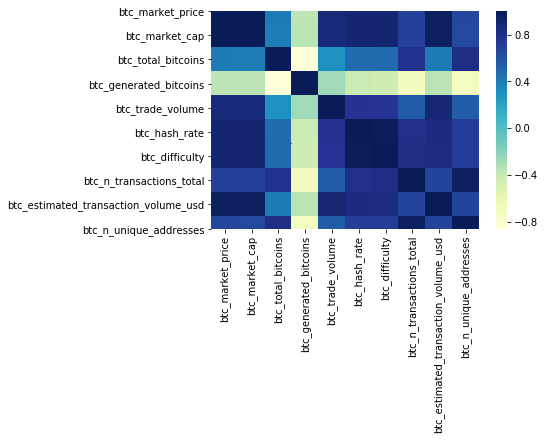

In [19]:
sns.heatmap(selected_col.corr(), cmap = 'YlGnBu')

## From the HeatMap above we can draw the following conclusions:


- We can see that there is a high correlation between the price of bitcoin and the market cap,
<br>
The marketcap is an important indicator for investors, it shows them the valuation of the product/company, and how many people
are willing to pay for it.
<br>
<br>
- We can also see that there is a high correlation between the price of bitcoin and the transaction volume,
<br>
The transaction volume is an important indicator as well that shows that the currency use and adoption.
<br>
<br>
- Another intresting thing we can see is that there is a high negative correlation between the price of bitcoin and the number of generated bitcoins,
Which implies that there is a connection between bitcoins inflation rate to the bitcoin price - when less bitcoins are being generated bitcoin price goes up,
<br>
Which implies that bitcoin is purely about supply and demand.

<br>

# PART 3 - Does The Media Have Impacts On The Bitcoin Price?

In this part i will check if the media has effects on the bitcoin price. I will perform a sentiment analysis,
<br>
In order to do it, I will use an API that belongs to https://newsapi.org/ to pull data from top news websites as well as bicoin news websites,
<br>
And i will try to see if there is a corrlation between the news and the bitcoin price.

In [20]:
api = NewsApiClient(api_key='d98a471e3f884b4b8239e1bb5901f560')

In [21]:
bitcoin_articles = api.get_everything(q='bitcoin',
                                  sources='bbc-news,the-verge,metro,crypto-coins-news,reddit,financial-times,business-insider,reuters,bloomberg,cnbc,fortune,cbc-news',
                                  domains='bbc.co.uk,techcrunch.com,coindesk.com,cointelegraph.com,reddit.com,twitter.com',
                                  from_param='2020-10-04',
                                  to='2016-11-29',
                                  language='en',
                                  sort_by='relevancy',
                                 )

In [22]:
bitcoin_articles = pd.DataFrame(bitcoin_articles['articles'])
bitcoin_articles['description'] = bitcoin_articles['description'].astype(str)

In [23]:
bitcoin_articles['Polarity'] = bitcoin_articles.apply(lambda x: TextBlob(x['description']).sentiment.polarity, axis=1)
bitcoin_articles['Subjectivity'] = bitcoin_articles.apply(lambda x: TextBlob(x['description']).sentiment.subjectivity, axis=1)
bitcoin_articles['Date'] = bitcoin_articles.apply(lambda x: parser.parse(x['publishedAt']).strftime('%Y.%m.%d'), axis=1)
bitcoin_articles['Time'] = bitcoin_articles.apply(lambda x: parser.parse(x['publishedAt']).strftime('%H:%M'), axis=1)

- Polarity represents if the news are positive or negative.
<br>
- Subjectivity represents how much you can rely on the news.

In [24]:
bitcoin_articles.groupby(by= 'Date').mean()

,Polarity,Subjectivity
Date,,
2017.11.29,0.181234,0.427208
2018.03.03,0.191667,0.358333
2018.03.15,0.200000,0.266667
2018.06.11,0.214921,0.432698
2018.07.17,0.325000,0.291667
2018.07.24,0.250000,0.850000
2018.08.14,-0.035185,0.546296
2018.09.02,0.083333,0.150000
2018.09.13,0.061905,0.323810


## News Analysis

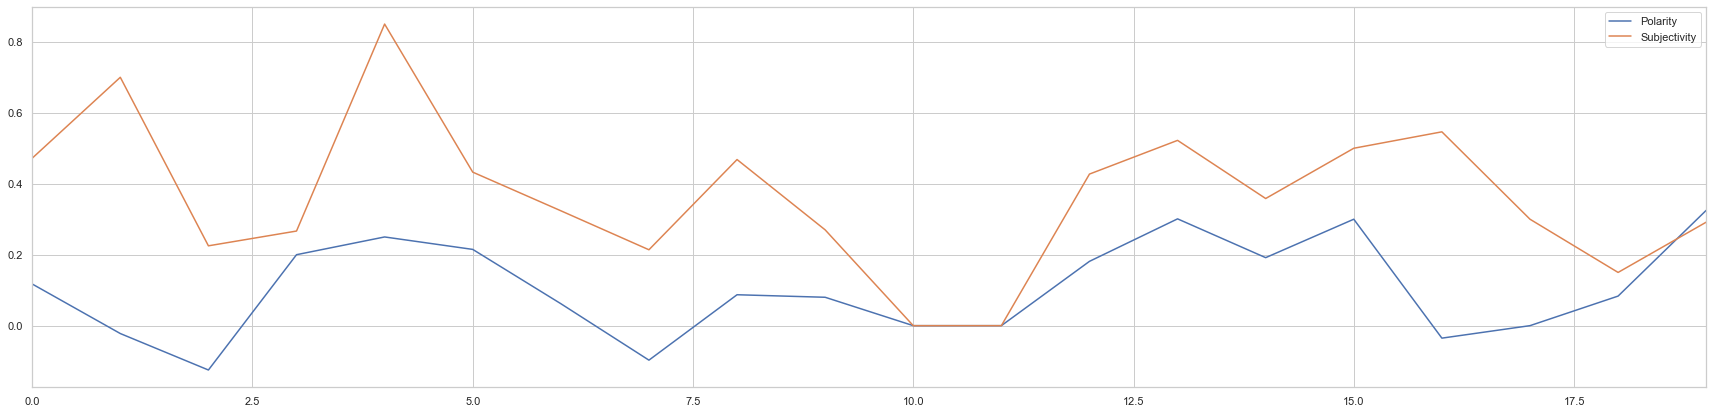

In [25]:
sns.set(style='whitegrid', palette= 'deep')
bitcoin_articles.plot(figsize=(30,7), sharey=True)

## Bitcoin prices correspondent to the news

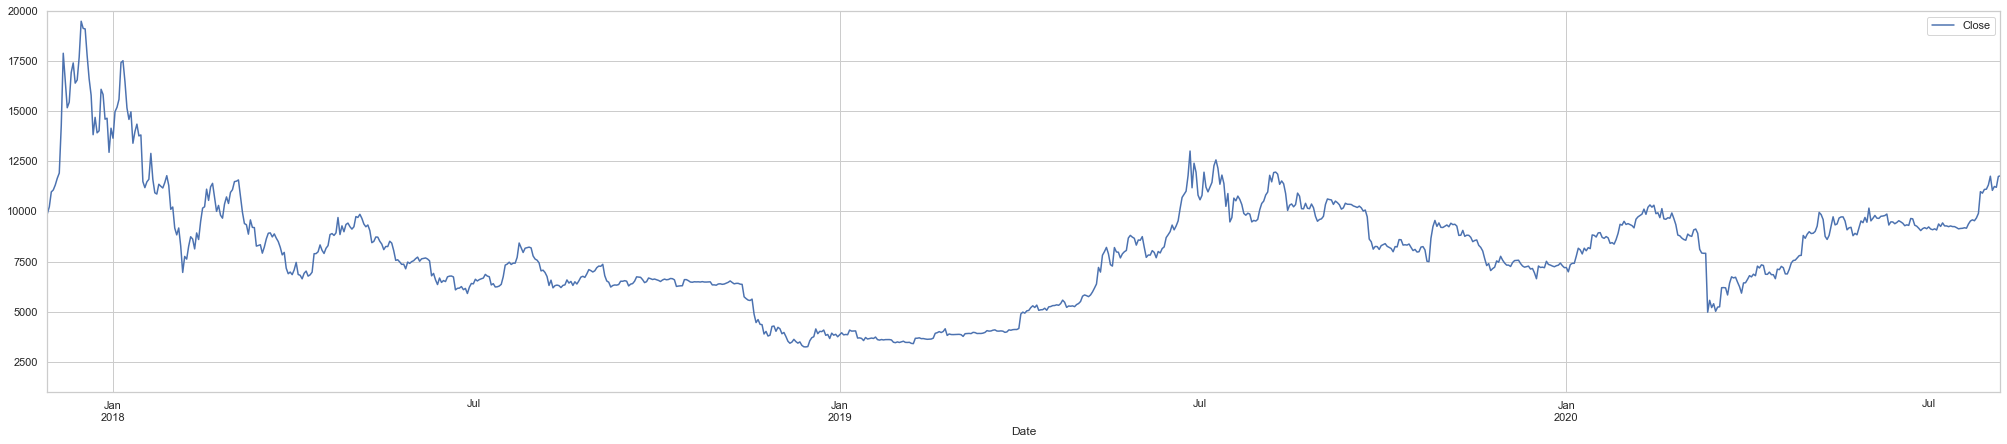

In [26]:
date_price = pd.read_csv('BTC-USD.csv', usecols= [0,4], index_col='Date', parse_dates=True)
date_price.plot(xlim= ['2017.11.29', '2020.08.06'], figsize= (35,7), ylim= [1000,20000])

## We Can Draw The Following conclusions from the graph above:

- The Polarity correlates with the prices of bitcoin at the same time,
- There is some effect on the price that manifests soon after the news are published.
<br>
- The Subjectivity is high, which means the news are reliable and can be trusted.

# Conclusions

### My Premise Was Correct - Bitcoin Is About Supply And Demand
We can see that over the years bitcoin gained more adoption, while there less and less generated bitcoins. when there is positive news people and companies rush to buy it and then the price goes up because meanwhile the supply goes down according to plan, Trading volume goes up as well (as we saw in the correlation part).
<br>
<br>
When people are selling the price goes down, The media gives a negative reports on bitcoin, And then the price goes down even more soon after.

### During the project I used the following sources:

https://www.youtube.com/watch?v=BEapKwW7558
<br>
https://www.youtube.com/watch?v=BLGJzMusanI